In [1]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [2]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [3]:
OVCA420_TGF_scRNAseq = pd.read_csv('OVCA420_TGFB1.normalized.txt',sep='\t',index_col=0)
OVCA420_EGF_scRNAseq = pd.read_csv('OVCA420_EGF.normalized.txt',sep='\t',index_col=0)
OVCA420_TNF_scRNAseq = pd.read_csv('OVCA420_TNF.normalized.txt',sep='\t',index_col=0)

OVCA420_TGF_scRNAseq

,AACAACCTCCAGCCTT,AAGACAACACGGCCAT,ACTGTCCTCCGATTAG,AGGCCACTCATCGACA,CAACAGTCATGCGTGC,CACCGTTTCAATCTCT,CCACGAGCAGGTCCGT,CCTCTAGCAATAACGA,CGTCCATGTTGCCAAT,CTATAGGAGTGTACCT,...,GCCATTCAGCACAAAT,GGAGGATGTGAACTAA,GGCGTCACAAGTCCAT,GGTTGTAGTGCACATT,GTAGATCAGGGACAGG,GTGCGTGGTGGCTTAT,TATACCTGTATCACGT,TCGACCTTCTGCACCT,TCGGTCTCAGCTACCG,TTGGGCGAGCCTGTGC
AL669831.5,0.000000,0.652703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.650899,0.0,0.0,0.0,0.00000,0.000000
FAM41C,0.000000,0.378685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000
SAMD11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.582189,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000
NOC2L,0.521141,0.652703,1.012346,0.555717,0.521002,0.625625,0.000000,0.689567,1.215370,0.0,...,0.910451,0.0,0.526786,0.0,0.650899,0.0,0.0,0.0,0.71622,0.000000
KLHL17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.650899,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BX004987.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000
MAFIP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000
AC011043.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000
AL354822.1,0.000000,0.000000,0.000000,0.315974,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.526786,0.0,0.000000,0.0,0.0,0.0,0.00000,0.989452


In [4]:
OVCA420_TGF_metadata = pd.read_csv('OVCA420_TGFB1_metadata.txt',sep='\t',index_col=0)
OVCA420_EGF_metadata = pd.read_csv('OVCA420_EGF_metadata.txt',sep='\t',index_col=0)
OVCA420_TNF_metadata = pd.read_csv('OVCA420_TNF_metadata.txt',sep='\t',index_col=0)

OVCA420_TGF_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Barcode,Drug,Target,CellLine,Treatment,Doublet,...,ConditionBroad,S.Score,G2M.Score,Phase,RNA_snn_res.0.075,seurat_clusters,RNA_snn_res.0.15,RNA_snn_res.0.3,RNA_snn_res.0.2,RNA_snn_res.0.25
AACAACCTCCAGCCTT,Plate4,14621,4167,0.083647,Bar50,Necrostatin-5,RIP1,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,0.075555,0.427359,G2M,0,0,0,0,0,0
AAGACAACACGGCCAT,Plate4,21722,4607,0.155925,Bar56,LY364947,TGFB1,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,0.124908,-0.108165,S,0,0,0,0,0,0
ACTGTCCTCCGATTAG,Plate4,28538,5481,0.132385,Bar56,LY364947,TGFB1,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,0.260002,-0.040041,S,0,0,0,0,0,0
AGGCCACTCATCGACA,Plate4,26911,5309,0.123704,Bar56,LY364947,TGFB1,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,0.041372,0.557194,G2M,0,0,0,0,0,0
CAACAGTCATGCGTGC,Plate4,14626,3902,0.153220,Bar56,LY364947,TGFB1,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,-0.034216,-0.106850,G1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGTGGTGGCTTAT,Plate4,5477,1771,0.110462,Bar69,NVP-BEZ235,PI3K,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,-0.065719,-0.071655,G1,0,1,0,3,4,1
TATACCTGTATCACGT,Plate4,9104,2997,0.083040,Bar67,Torin 1,mTOR,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,0.217266,0.190307,S,0,1,3,3,4,1
TCGACCTTCTGCACCT,Plate4,6991,2074,0.054499,Bar67,Torin 1,mTOR,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,-0.063509,-0.109270,G1,0,0,0,3,4,0
TCGGTCTCAGCTACCG,Plate4,9554,2879,0.047519,Bar69,NVP-BEZ235,PI3K,OVCA420,TGFB1,Singlet,...,TGFB1_Inhibited,-0.218770,-0.168474,G1,0,1,3,3,4,1


In [5]:
OVCA420_TGF_init_ctrls = OVCA420_TGF_scRNAseq[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
OVCA420_EGF_init_ctrls = OVCA420_EGF_scRNAseq[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
OVCA420_TNF_init_ctrls = OVCA420_TNF_scRNAseq[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)


In [6]:
# normalizing the datasets
OVCA420_TGF_scRNAseq_norm_ = OVCA420_TGF_scRNAseq.subtract(OVCA420_TGF_init_ctrls,axis=0)
OVCA420_EGF_scRNAseq_norm_ = OVCA420_EGF_scRNAseq.subtract(OVCA420_EGF_init_ctrls,axis=0)
OVCA420_TNF_scRNAseq_norm_ = OVCA420_TNF_scRNAseq.subtract(OVCA420_TNF_init_ctrls,axis=0)


In [7]:
# taking intersection of genes
genes_list_OVCA420 = list(set(OVCA420_TGF_scRNAseq_norm_.index) & set(OVCA420_EGF_scRNAseq_norm_.index) & set(OVCA420_TNF_scRNAseq_norm_.index))
print(len(genes_list_OVCA420))
OVCA420_TGF_scRNAseq_norm = OVCA420_TGF_scRNAseq_norm_.loc[genes_list_OVCA420].copy()
OVCA420_EGF_scRNAseq_norm = OVCA420_EGF_scRNAseq_norm_.loc[genes_list_OVCA420].copy()
OVCA420_TNF_scRNAseq_norm = OVCA420_TNF_scRNAseq_norm_.loc[genes_list_OVCA420].copy()


13688


In [8]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [9]:
# calculating STV
trainset_epi = OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes = OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

34.06761577635142

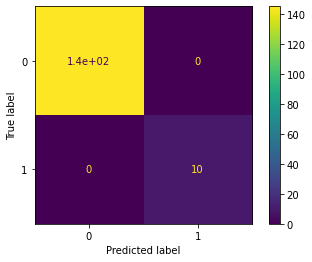

In [10]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [11]:
norm_vec_df.to_csv('EMT_STV_scRNAseq_OVCA420.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
ALDH1A1,-0.077516,-0.089244
AKR1B10,-0.074041,-0.091150
KRT15,-0.071259,-0.027501
KRT13,-0.071034,-0.028003
AKR1C1,-0.061904,-0.062061
...,...,...
TFPI2,0.080353,0.102859
ANGPTL4,0.080968,0.070574
SERPINE1,0.091304,0.082616
PMEPA1,0.095661,0.107383


In [12]:
norm_vec_df.loc['FTL']

norm_vec   -0.028776
s_vec      -0.042728
Name: FTL, dtype: float64

In [13]:
# run PCA and plot separation

pca = PCA(n_components=3)
Spca = pca.fit_transform(gene_trainset.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_sc = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=gene_trainset.columns)
PCA_sc

Explained variances by components:  [0.04125009 0.02429577 0.01999517] total variance explained:  0.08554104006606306


,PC1,PC2,PC3
AAACCCATCGCACGAC,-4.404844,0.735681,2.674027
AAGCCATCAAGTGCAG,-2.151443,-7.073066,-0.544898
AAGCCATCAGAGGTTG,-4.417130,-3.468202,-3.146187
AATAGAGGTACGTACT,-0.839821,0.045511,1.364125
ACAGGGATCTAGTGAC,-2.978919,-4.518612,-1.496497
...,...,...,...
GCTTGGGAGGAAACGA,19.964189,-1.215186,-4.321406
GGACGTCAGGAGCTGT,19.951224,-3.117381,-1.589331
TAGAGTCGTCAAAGTA,21.964200,2.402704,-2.815643
TCAGTTTAGAGGGCGA,14.312309,2.042961,-2.407081


In [14]:
trainset_epi_PCA = PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes_PCA = PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset_PCA = pd.concat([trainset_epi_PCA,trainset_mes_PCA],axis=0)

cls_PCA = list(np.full(len(trainset_epi_PCA.index),0)) + list(np.full(len(trainset_mes_PCA.index),1))

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(gene_trainset_PCA,cls_PCA)

print(svc_PCA.intercept_)


[-3.29248595]


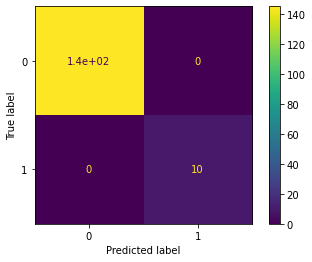

In [15]:
plot_confusion_matrix(svc_PCA,gene_trainset_PCA,cls_PCA)
# PCA introduces distortion to the data

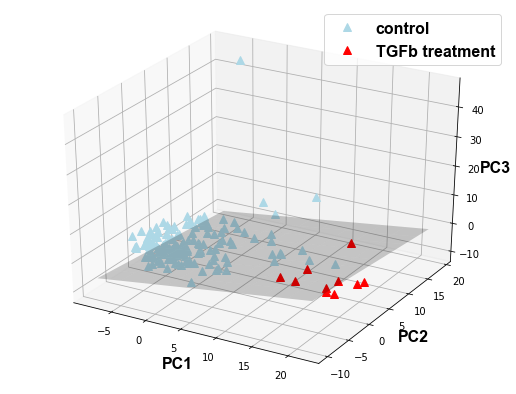

In [16]:
# 3D visualization with plane


fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

z2 = lambda x,y: (-svc_PCA.intercept_-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
tmpx = np.linspace(min(gene_trainset_PCA.iloc[:,0]),max(gene_trainset_PCA.iloc[:,0]),10)
tmpy = np.linspace(min(gene_trainset_PCA.iloc[:,1]),max(gene_trainset_PCA.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)
zs = z2(xs,ys)

ax.plot_surface(xs, ys, zs,color='black',linewidth=0,alpha=0.2)


ax.plot3D(PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,0],PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,1],PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,2],'^',color='lightblue',label='control',ms=8) 

ax.plot3D(PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,0],PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,1],PCA_sc.loc[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,2],'^',color='red',label='TGFb treatment',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [17]:
# entring parameters for plots
drug_plot='CHIR99021'
gene_name='CDH1'

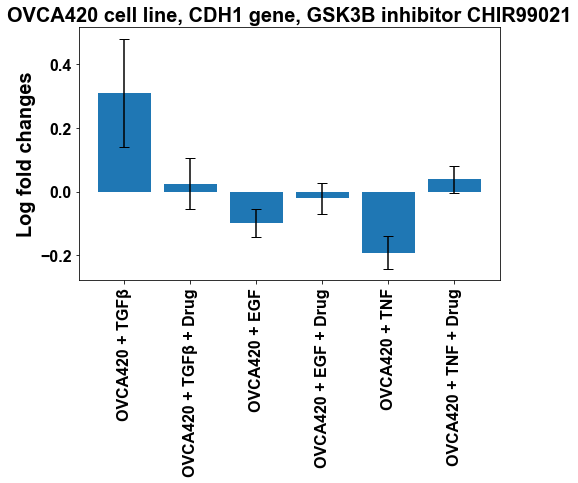

In [18]:
# make bar plot for all cells
names = ['OVCA420 + TGFβ','OVCA420 + TGFβ + Drug','OVCA420 + EGF','OVCA420 + EGF + Drug','OVCA420 + TNF','OVCA420 + TNF + Drug']

if drug_plot in list(set(OVCA420_TGF_metadata['Drug'])):
    OVCA420_TGF_gene_ctrl = statistics.mean(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    OVCA420_TGF_gene_ctrl_err = stats.sem(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    OVCA420_TGF_gene_drug = statistics.mean(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    OVCA420_TGF_gene_drug_err = stats.sem(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TGF_gene_ctrl = statistics.mean(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    OVCA420_TGF_gene_ctrl_err = stats.sem(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    OVCA420_TGF_gene_drug = 0
    OVCA420_TGF_gene_drug_err = 0

if drug_plot in list(set(OVCA420_EGF_metadata['Drug'])):
    OVCA420_EGF_gene_ctrl = statistics.mean(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    OVCA420_EGF_gene_ctrl_err = stats.sem(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    OVCA420_EGF_gene_drug = statistics.mean(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    OVCA420_EGF_gene_drug_err = stats.sem(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_EGF_gene_ctrl = statistics.mean(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    OVCA420_EGF_gene_ctrl_err = stats.sem(OVCA420_EGF_scRNAseq_norm[OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    OVCA420_EGF_gene_drug = 0
    OVCA420_EGF_gene_drug_err = 0

if drug_plot in list(set(OVCA420_TNF_metadata['Drug'])):
    OVCA420_TNF_gene_ctrl = statistics.mean(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    OVCA420_TNF_gene_ctrl_err = stats.sem(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    OVCA420_TNF_gene_drug = statistics.mean(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    OVCA420_TNF_gene_drug_err = stats.sem(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TNF_gene_ctrl = statistics.mean(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    OVCA420_TNF_gene_ctrl_err = stats.sem(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    OVCA420_TNF_gene_drug = 0
    OVCA420_TNF_gene_drug_err = 0

values = [OVCA420_TGF_gene_ctrl,OVCA420_TGF_gene_drug,OVCA420_EGF_gene_ctrl,OVCA420_EGF_gene_drug,OVCA420_TNF_gene_ctrl,OVCA420_TNF_gene_drug]
errs = [OVCA420_TGF_gene_ctrl_err,OVCA420_TGF_gene_drug_err,OVCA420_EGF_gene_ctrl_err,OVCA420_EGF_gene_drug_err,OVCA420_TNF_gene_ctrl_err,OVCA420_TNF_gene_drug_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('OVCA420 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

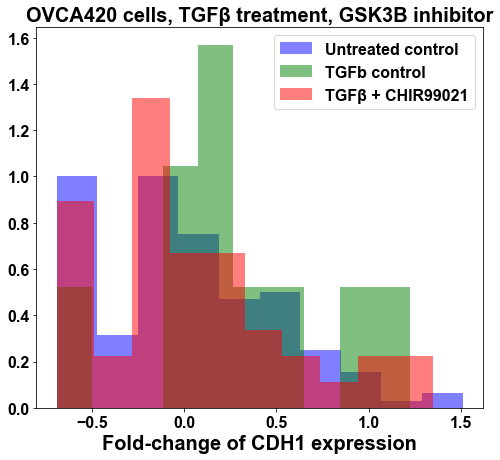

In [19]:
# plot distribution for specific gene

OVCA420_TGF_gene_notr = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
OVCA420_TGF_gene_ctrl = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(OVCA420_TGF_metadata['Drug'])):
    OVCA420_TGF_gene_drug = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TGF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(OVCA420_TGF_gene_notr, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(OVCA420_TGF_gene_ctrl, bins=10,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(OVCA420_TGF_gene_drug, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('OVCA420 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

In [20]:
# plotting DPD distribution
drug_plot='CHIR99021'

DPD for epithelial state = -11.204175414516689 ± 0.06726429463111645
DPD for TGFb control = 10.369939744679494 ± 0.0006613274809939955
DPD for GSK3B inhibitor = 1.0582457114639405 ± 0.4992075802227795


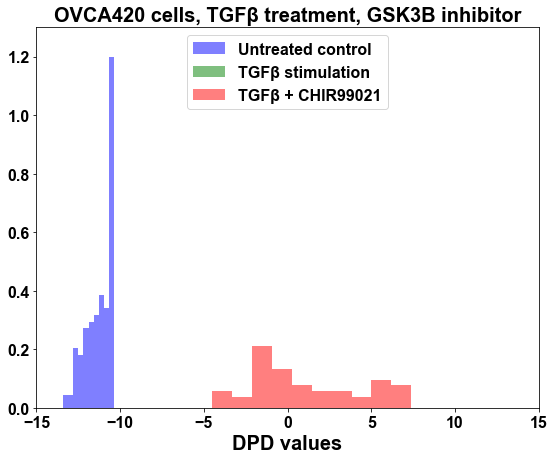

In [21]:
DPDs_epi = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('OVCA420 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
plt.xlim(-15,15)
plt.ylim(0,1.3)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -11.204175414516689 ± 0.06726429463111645
DPD for TGFb control = 10.369939744679494 ± 0.0006613274809939955
DPD for GSK3B inhibitor = 1.0582457114639405 ± 0.4992075802227795


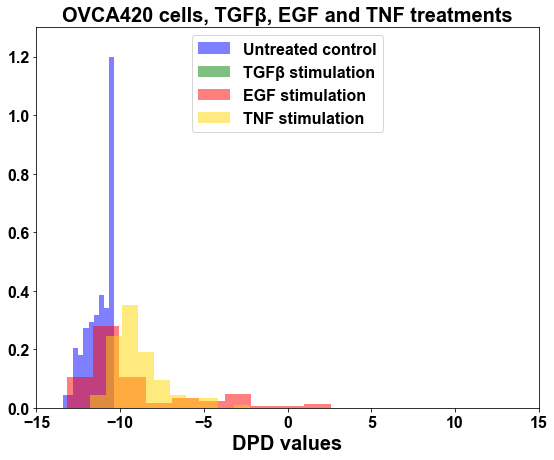

In [22]:
DPDs_epi = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_TNF, bins=10,density=True,color='gold',label='TNF stimulation',alpha=0.5) 

plt.title('OVCA420 cells, TGFβ, EGF and TNF treatments',**fontTitle)
plt.xlim(-15,15)
plt.ylim(0,1.3)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

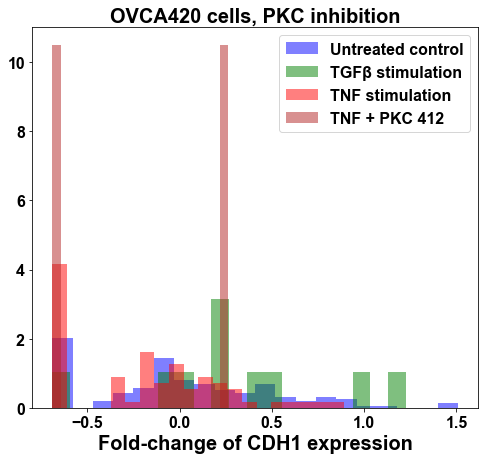

In [23]:
# plot distribution for specific gene
gene_name='CDH1'
drug_plot='PKC 412'

OVCA420_TGF_gene_notr = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
OVCA420_TGF_gene_ctrl = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(OVCA420_TGF_metadata['Drug'])):
    OVCA420_TGF_gene_drug = list(OVCA420_TGF_scRNAseq_norm[OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TGF_gene_drug = []

OVCA420_TNF_gene_notr = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
OVCA420_TNF_gene_ctrl = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
if drug_plot in list(set(OVCA420_TNF_metadata['Drug'])):
    OVCA420_TNF_gene_drug = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TNF_gene_drug = []

OVCA420_TNF_gene_notr = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
OVCA420_TNF_gene_ctrl = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
if drug_plot in list(set(OVCA420_TNF_metadata['Drug'])):
    OVCA420_TNF_gene_drug = list(OVCA420_TNF_scRNAseq_norm[OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    OVCA420_TNF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(OVCA420_TGF_gene_notr, bins=20,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(OVCA420_TGF_gene_ctrl, bins=20,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(OVCA420_TNF_gene_ctrl, bins=20,density=True,color='red',label='TNF stimulation',alpha=0.5)
plt.hist(OVCA420_TNF_gene_drug, bins=20,density=True,color='firebrick',label='TNF + ' + drug_plot,alpha=0.5)

plt.title('OVCA420 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

DPD for epithelial state = -11.204175414516689 ± 0.06726429463111645
DPD for TGFb control = 10.369939744679494 ± 0.0006613274809939955
DPD for PKC inhibitor = -1.43195996051786 ± 1.8077473319961965


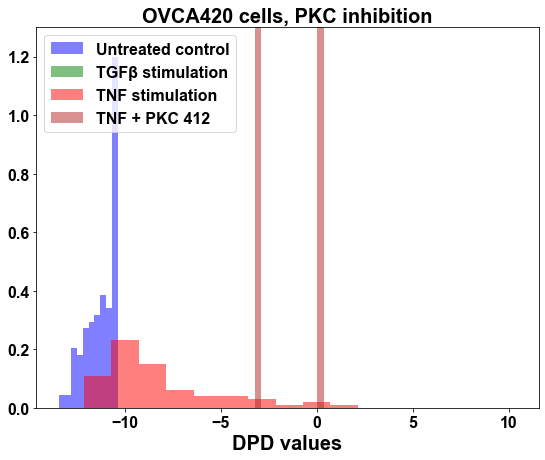

In [24]:
DPDs_epi = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_TNF, bins=10,density=True,color='red',label='TNF stimulation',alpha=0.5) 
plt.hist(DPDs_drg, bins=10,density=True,color='firebrick',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('OVCA420 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
plt.ylim(0,1.3)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [25]:
DPDs_epi = []
for code in OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for EGF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='EGF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('OVCA420 cells, EGF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -11.204175414516689 ± 0.06726429499755991
DPD for EGF control = -9.277146179341432 ± 0.3166301703317729


StatisticsError: mean requires at least one data point

<Figure size 648x504 with 0 Axes>

DPD for epithelial state = -11.204175414516689 ± 0.06726429463111645
DPD for TNF control = -8.12872478117033 ± 0.3507334226560044
DPD for PKC inhibitor = -1.43195996051786 ± 1.8077473319961965


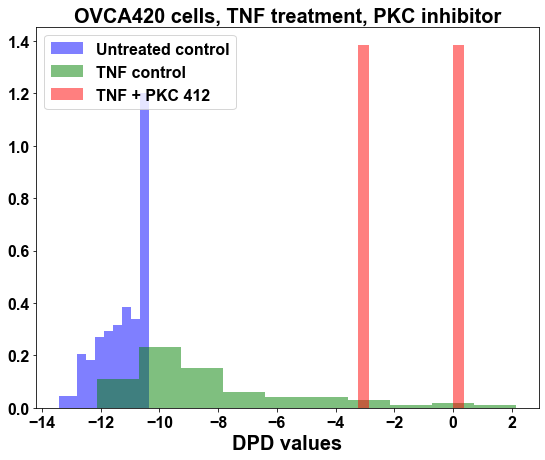

In [26]:
DPDs_epi = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TNF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TNF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('OVCA420 cells, TNF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [27]:
# now we need to calculate DPDs
dr_legend['DPD_OVCA420_TGFB']=np.nan
dr_legend['DPD_OVCA420_EGF']=np.nan
dr_legend['DPD_OVCA420_TNF']=np.nan

for drug in list(set(OVCA420_TGF_metadata['Drug'])):
    #print("Processing data for OVCA420 cells, TGFB, " + drug)
    DPDs_drg = []
    for code in OVCA420_TGF_metadata.loc[OVCA420_TGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_OVCA420_TGFB'] = statistics.mean(DPDs_drg)

for drug in list(set(OVCA420_EGF_metadata['Drug'])):
    #print("Processing data for OVCA420 cells, EGF, " + drug)
    DPDs_drg = []
    for code in OVCA420_EGF_metadata.loc[OVCA420_EGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_OVCA420_EGF'] = statistics.mean(DPDs_drg)

for drug in list(set(OVCA420_TNF_metadata['Drug'])):
    #print("Processing data for OVCA420 cells, TNF, " + drug)
    DPDs_drg = []
    for code in OVCA420_TNF_metadata.loc[OVCA420_TNF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_OVCA420_TNF'] = statistics.mean(DPDs_drg)

dr_legend.to_csv('OVCA420_EMT_scDPD_vals.csv')
dr_legend

,Target,DPD_OVCA420_TGFB,DPD_OVCA420_EGF,DPD_OVCA420_TNF
Drug,,,,
PKC 412,PKC,4.326319,NaN,-1.431960
Doramapimod,p38,2.233903,-9.539309,-8.771170
Erlotinib,EGFR,0.761815,-8.289495,-7.739637
NVP-BEZ235,PI3K,1.516771,-2.202657,-2.878833
Phthalazinone Pyrazole,Aurora-A,0.828591,-8.742068,-8.055435
Torin 1,mTOR,1.091579,-2.679168,-2.350830
BIBF 1120,VGFR/PDGFR/FGFR,2.138521,-9.459427,-9.276263
CAY10657,IKK2,2.110841,-7.666094,-6.516300
Ruxolitinib,JAK,5.744703,-8.646716,-9.076817


In [28]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [29]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)
modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [30]:
# filling R matrices for OVCA420 cells
R_OVCA420_TGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_OVCA420_EGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_OVCA420_TNF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)


# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_OVCA420_TGFB']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_OVCA420_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_OVCA420_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_OVCA420_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_OVCA420_EGF']
        x1 = dr_legend.loc[pert,'DPD_OVCA420_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_OVCA420_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_OVCA420_TNF']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TNF.at['DPD',pert] = R_global

R_OVCA420_EGF.drop('Gefitinib', axis=1, inplace=True)
R_OVCA420_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_OVCA420_TGF.to_csv('R_OVCA420_TGFb_DPD.csv')
R_OVCA420_EGF.to_csv('R_OVCA420_EGF_DPD.csv')
R_OVCA420_TNF.to_csv('R_OVCA420_TNF_DPD.csv')
R_OVCA420_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-1.616478,-0.926536,-0.828523,-0.793777,-0.961986,-0.853734,-0.894736,-0.582802,-0.784579,-0.756725,-0.920097,-1.537611,-0.796446,-0.446024,-0.897951


In [31]:
R_OVCA420_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.158092,-0.171992,-0.01927,-0.074999,0.762572,0.711208,NaN,-0.027482,0.070699,0.057677,-0.031713,0.173658,0.067955,-0.042081


In [32]:
R_OVCA420_TNF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.202586,0.047866,0.034467,-0.123707,0.194327,0.645844,0.7108,0.82384,-0.073245,-0.087864,0.009016,-0.027072,0.198361,-0.104452,-0.085394
